Null Hypotheses:

1) Alcohol consumption does not increase heart disease rate.

2) Fruit consumption does not decrease heart disease rate.

3) Green vegetables consumption does not decrease heart disease rate.

4) Fried potato consumption does not increase heart disease rate.

5) Smoking does not increase heart disease rate.

6) Exercising does not decrease heart disease rate.

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

from helpers import lin_reg
from helpers import box_plot

# File to Load (Remember to Change These)
csv_path = Path("datasets/CVD_cleaned.csv")

data_df = pd.read_csv(csv_path)


In [2]:
data_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Healthness_Score,Behaviour Score
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150,32.66,14.54,Yes,0,30,16,12,5,3
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165,77.11,28.29,No,0,30,0,4,4,3
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163,88.45,33.47,No,4,12,3,16,5,4
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180,93.44,28.73,No,0,30,30,8,4,5
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191,88.45,24.37,Yes,0,8,4,0,6,4


In [3]:
# Get the unique values for 'Heart_Disease' column.
heart_desease_values = list(data_df['Heart_Disease'].unique())
heart_desease_values

['No', 'Yes']

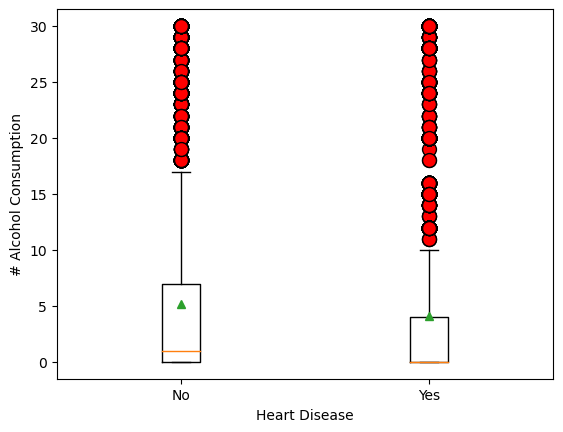

In [28]:
# Box plots for Alcohol_Consumption
ac_plot_dict = {}
for value in heart_desease_values:
    ac_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['Alcohol_Consumption'])
    
box_plot(ac_plot_dict,"Heart Disease","# Alcohol Consumption")

Alcohol_Consumption Analysis:

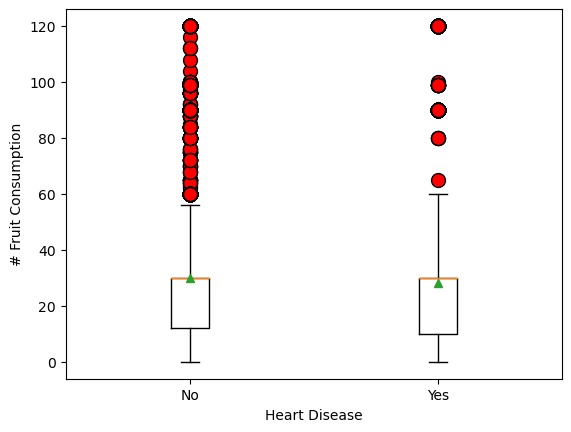

In [5]:
#Box plots for Fruit_Consumption

fc_plot_dict = {}
for value in heart_desease_values:
    fc_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['Fruit_Consumption'])
    
box_plot(plt, fc_plot_dict,"Heart Disease","# Fruit Consumption")

Fruit_Consumption Analysis

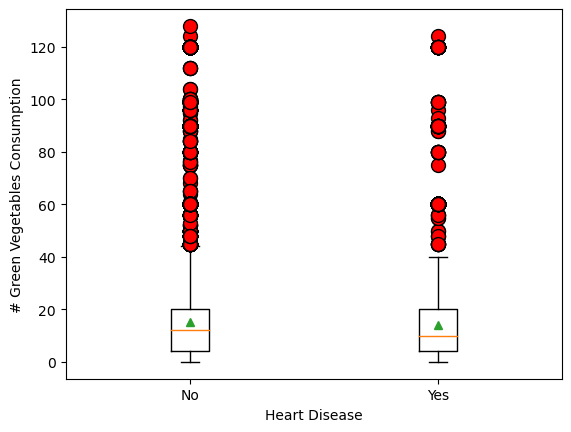

In [6]:
#Box plots for Green_Vegetables_Consumption

gvc_plot_dict = {}
for value in heart_desease_values:
    gvc_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['Green_Vegetables_Consumption'])
    
box_plot(plt, gvc_plot_dict,"Heart Disease","# Green Vegetables Consumption")

Green_Vegetables_Consumption Analysis

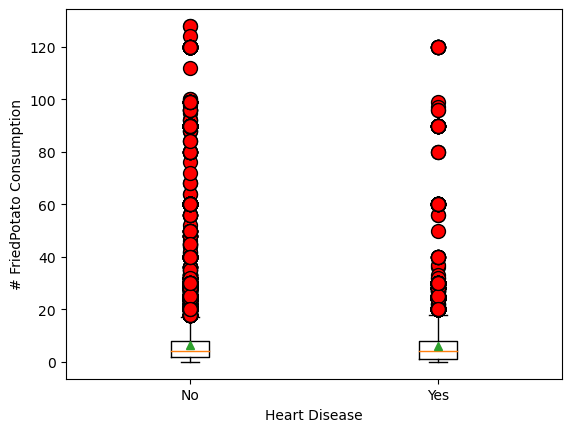

In [7]:
#Box plots for FriedPotato_Consumption

fpc_plot_dict = {}
for value in heart_desease_values:
    fpc_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['FriedPotato_Consumption'])
    
box_plot(plt, fpc_plot_dict,"Heart Disease","# FriedPotato Consumption")

FriedPotato_Consumption ANalysis

In [41]:
#Pie charts for Smoking_History

smoker_df = data_df.loc[data_df['Smoking_History'] == "Yes", :]
non_smoker_df = data_df.loc[data_df['Smoking_History'] == "No", :]

smoker_with_hd_df = smoker_df.loc[smoker_df['Heart_Disease'] == 'Yes', :]
smoker_without_hd_df = smoker_df.loc[smoker_df['Heart_Disease'] == 'No', :]

smoker_count = len(smoker_df.index)
smoker_with_hd_count = len(smoker_with_hd_df.index)
smoker_without_hd_count = len(smoker_without_hd_df.index)

smoker_with_hd_percentage = smoker_with_hd_count/smoker_count
smoker_without_hd_percentage = smoker_without_hd_count/smoker_count

#colors = ["red","lightblue"]
#plt.pie([smoker_with_hd_percentage, smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Smoker')
#plt.axis("equal")
#plt.show()

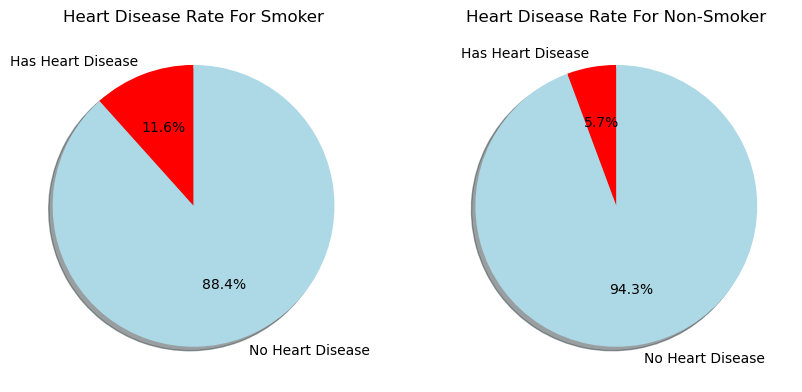

In [40]:
non_smoker_with_hd_df = non_smoker_df.loc[non_smoker_df['Heart_Disease'] == 'Yes', :]
non_smoker_without_hd_df = non_smoker_df.loc[non_smoker_df['Heart_Disease'] == 'No', :]

non_smoker_count = len(non_smoker_df.index)
non_smoker_with_hd_count = len(non_smoker_with_hd_df.index)
non_smoker_without_hd_count = len(non_smoker_without_hd_df.index)

non_smoker_with_hd_percentage = non_smoker_with_hd_count/non_smoker_count
non_smoker_without_hd_percentage = non_smoker_without_hd_count/non_smoker_count

colors = ["red","lightblue"]
#plt.pie([non_smoker_with_hd_percentage, non_smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Non-Smoker')
#plt.axis("equal")
#plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([smoker_with_hd_percentage, smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Heart Disease Rate For Smoker')

ax2.pie([non_smoker_with_hd_percentage, non_smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Heart Disease Rate For Non-Smoker')

plt.show()


Smoking_History Analysis

In [44]:
#Pie charts for Exercise
group1 = data_df.loc[data_df['Exercise'] == "Yes", :]


group1_yes = group1.loc[group1['Heart_Disease'] == 'Yes', :]
group1_no = group1.loc[group1['Heart_Disease'] == 'No', :]

group1_count = len(group1.index)
group1_yes_percent = len(group1_yes.index)/group1_count
group1_no_percent = len(group1_no.index)/group1_count

#colors = ["red","lightblue"]
#plt.pie([group1_yes_percent, group1_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Those Who Exercise')
#plt.axis("equal")
#plt.show()

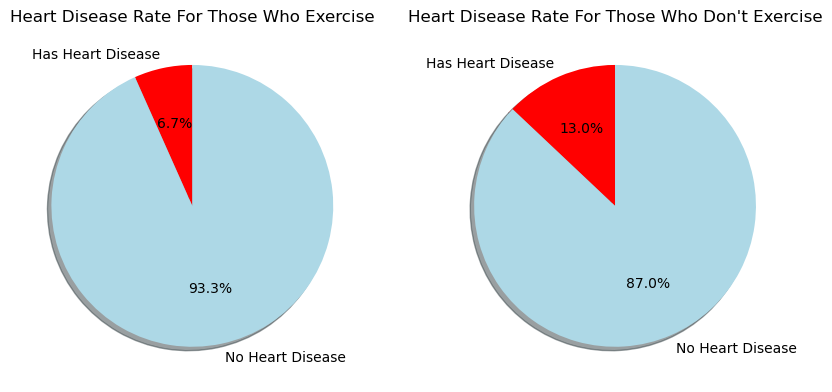

In [45]:
group2 = data_df.loc[data_df['Exercise'] == "No", :]

group2_yes = group2.loc[group2['Heart_Disease'] == 'Yes', :]
group2_no = group2.loc[group2['Heart_Disease'] == 'No', :]

group2_count = len(group2.index)
group2_yes_percent = len(group2_yes.index)/group2_count
group2_no_percent = len(group2_no.index)/group2_count

colors = ["red","lightblue"]
#plt.pie([group2_yes_percent, group2_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Those Who Don\'t Exercise')
#plt.axis("equal")
#plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([group1_yes_percent, group1_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Heart Disease Rate For Those Who Exercise')

ax2.pie([group2_yes_percent, group2_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Heart Disease Rate For Those Who Don\'t Exercise')

plt.show()


Exercise ANalysis